In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("D:\MyFiles\Downloads\DS1_C5_S5_Hotel Dataset.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8776\3566779224.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\MyFiles\Downloads\DS1_C5_S5_Hotel Dataset.csv")


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [3]:
#TASK - 1 DATA CLEANING

df.drop_duplicates(inplace=True)

df.fillna({"agent": df["agent"].mean().round(2),"company": df["company"].mean().round(2)}, inplace=True)

num_cols = df.select_dtypes(include=['number']).columns
num_df = df[num_cols]


cat_cols = df.select_dtypes(exclude=['number']).columns
cat_df = df[cat_cols]

print("Numerical:", num_df.columns, "\n")
print("Categorical:", cat_df.columns, "\n")

Numerical: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object') 

Categorical: Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object') 



In [4]:
df.shape

(1875, 32)

In [5]:

num_df = df.select_dtypes(include = ['number'])
cat_df = df.select_dtypes(exclude = ['number'])

print(num_df.columns)
print(cat_df.columns)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


Correlation between Lead Time and Cancellation: 0.17418007231715188


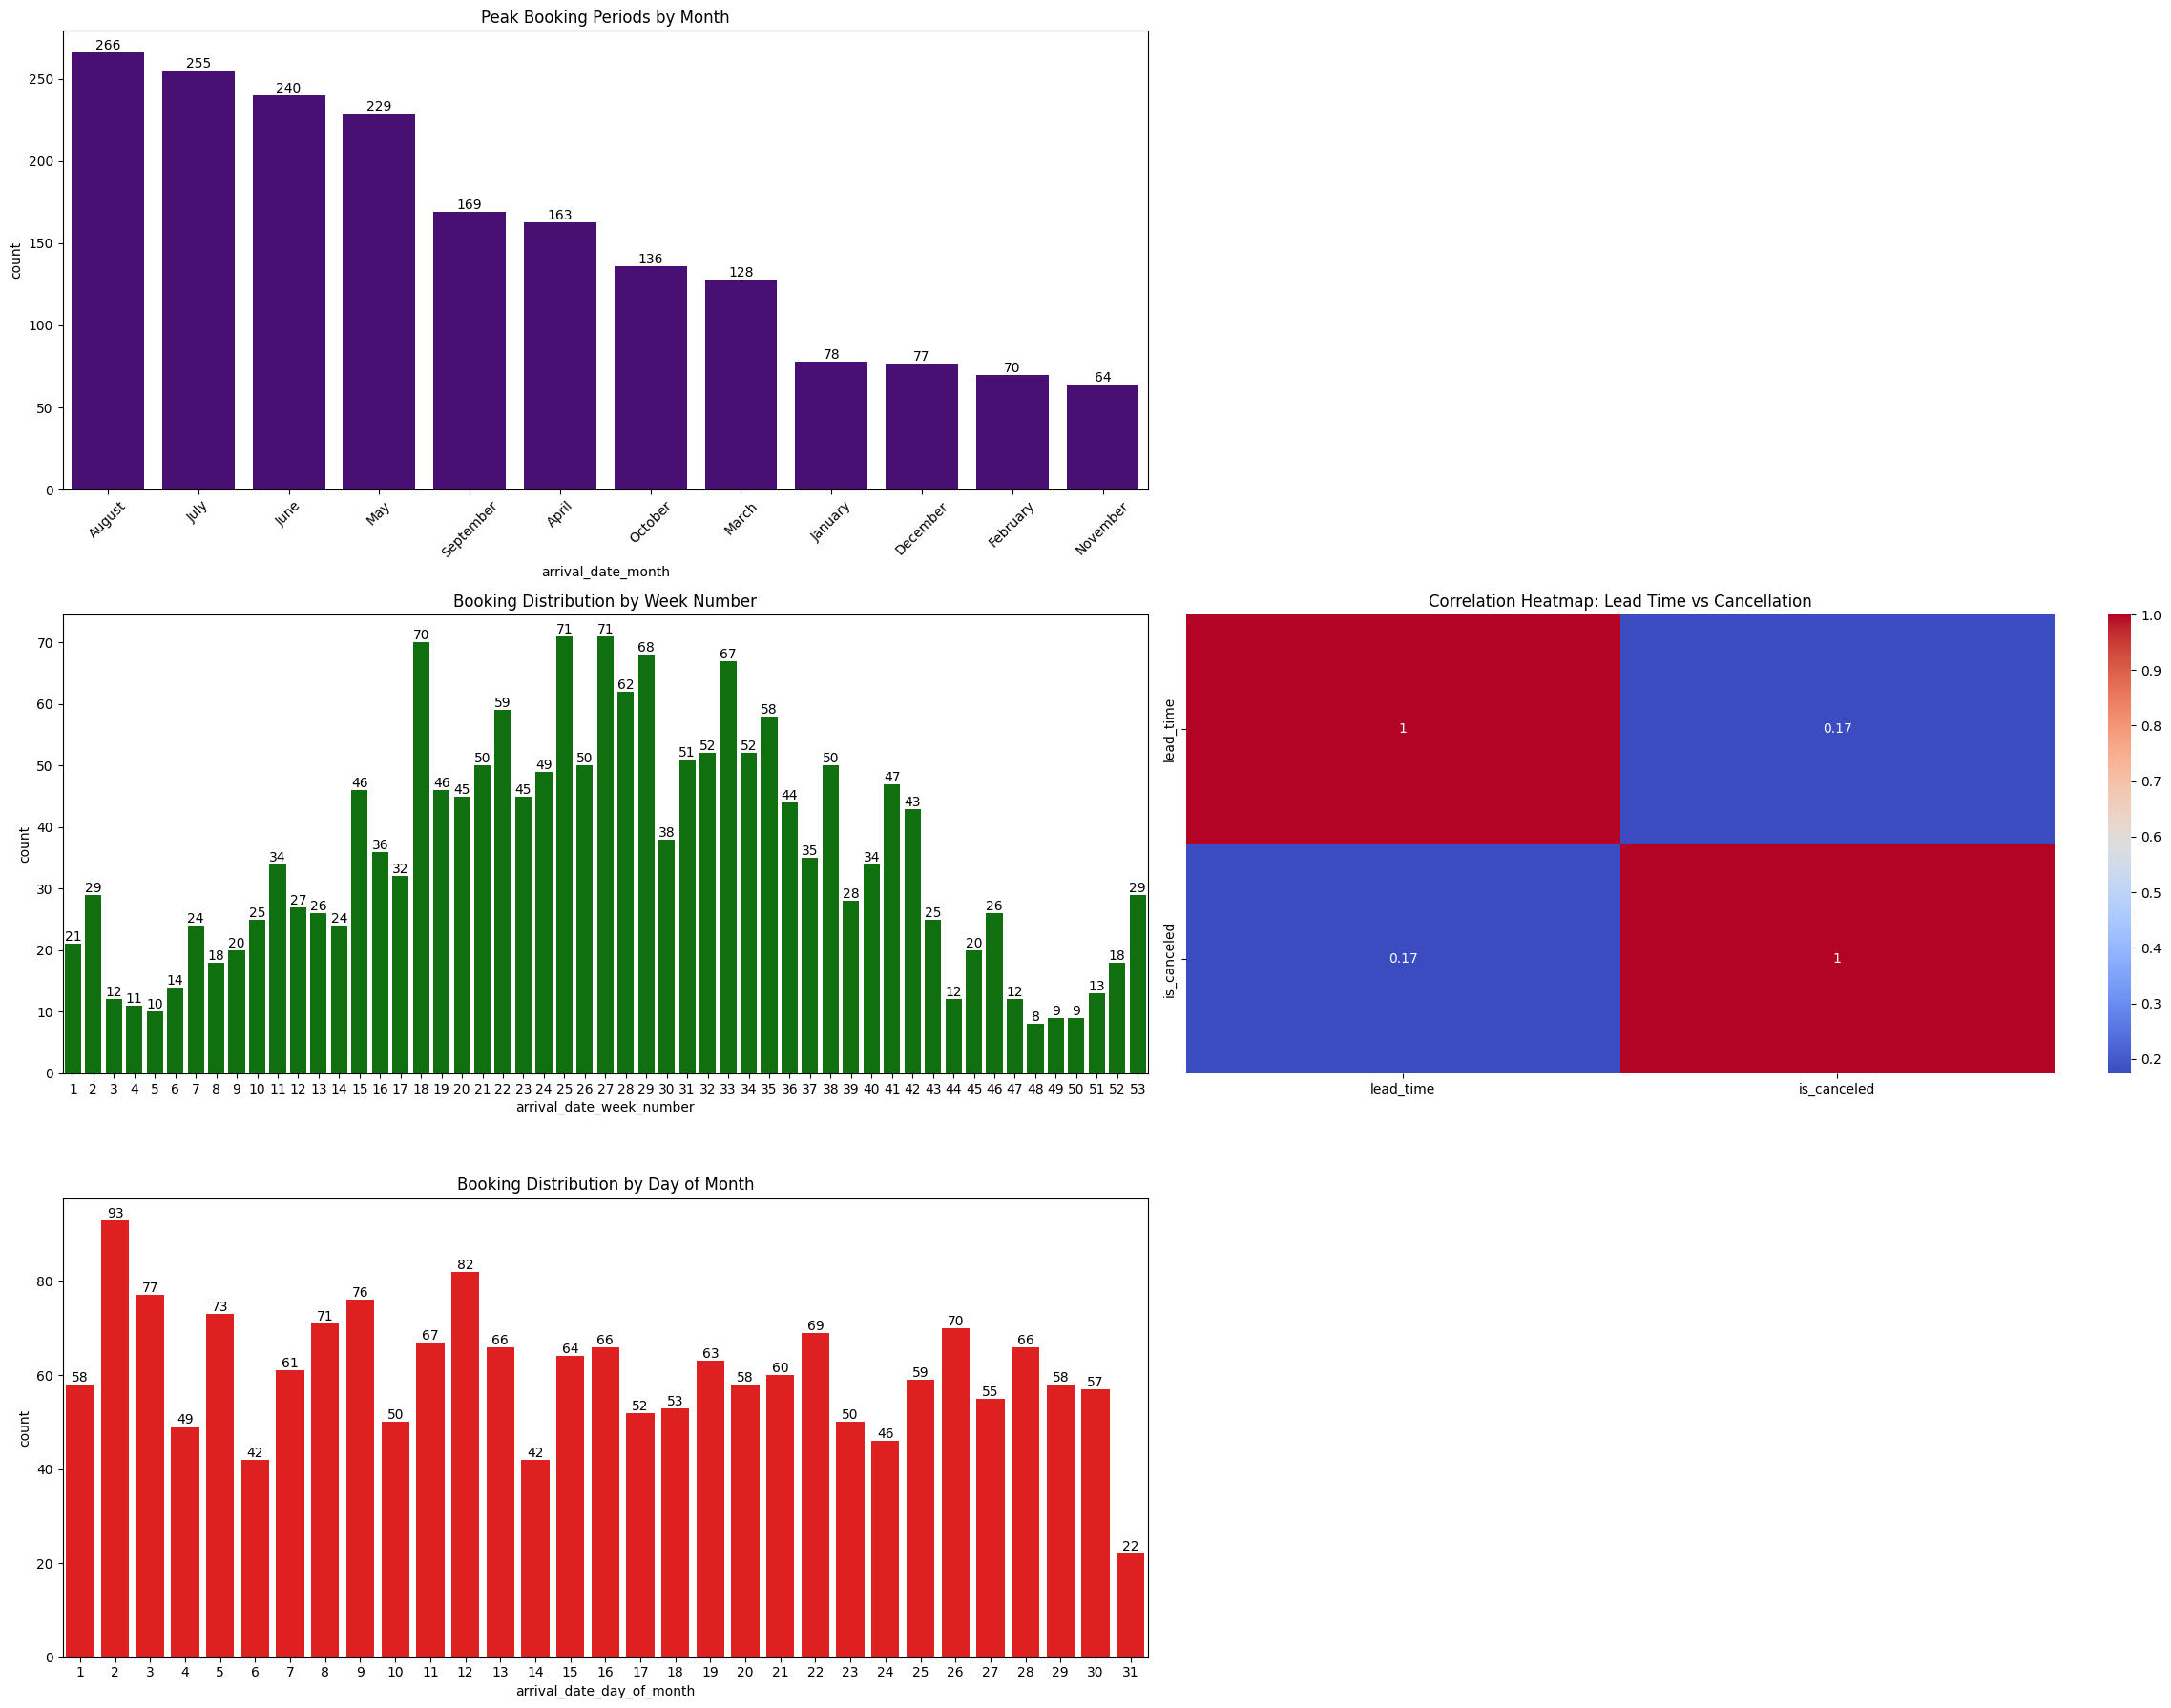

In [6]:
# TASK 2

# I. Peak booking periods

plt.figure(figsize=(24,18))

# I. Peak Booking Periods by Month
plt.subplot(3,2,1)
adm = sns.countplot(data=df, x="arrival_date_month", order=df["arrival_date_month"].value_counts().index, color='indigo')
adm.bar_label(adm.containers[0])
plt.title("Peak Booking Periods by Month")
plt.xticks(rotation=45)

# II. Lead time vs cancellation correlation and heatmap
corr = df["lead_time"].corr(df["is_canceled"])
print("Correlation between Lead Time and Cancellation:", corr)

plt.subplot(3,2,4)
sns.heatmap(df[["lead_time", "is_canceled"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Lead Time vs Cancellation")

# III. Bookings by week number
plt.subplot(3,2,3)
adwn = sns.countplot(data=df, x="arrival_date_week_number", color='green')
adwn.bar_label(adwn.containers[0])
plt.title("Booking Distribution by Week Number")

# IV. Bookings by day of month
plt.subplot(3,2,5)
addm = sns.countplot(data=df, x="arrival_date_day_of_month", color='red')
addm.bar_label(addm.containers[0])
plt.title("Booking Distribution by Day of Month")

plt.tight_layout()
plt.show()


# Task 2 – Booking Patterns
## Peak Booking Periods by Month (Countplot)

- Summer (June-August) has the most bookings, with 741 total (36% of all).
- Winter (November-February) has the fewest, with 289 bookings (14%).
- May see slight spikes due to holidays, ideal for promotions.

## Correlation Heatmap - Lead Time vs Cancellation

- There is a weak positive correlation (r=0.17) between lead time and cancellations.
- Longer lead times are slightly more likely to be associated with cancellations.
- The relationship is not strong, indicating other factors play a larger role in cancellations

## Booking Distribution by Week Number (Countplot)

- Summer weeks (25-35) have high bookings, averaging 53 per week.
- Early and late weeks (1-10, 45-52) have low bookings, averaging 31.
- Festival weeks (e.g., week 52) see 18% more bookings, good for pricing.

## Booking Distribution by Day of Month (Countplot)

- Month start/end (days 1-5, 28-31) have 41% of bookings.
- Mid-month (days 10-20) has low bookings, only 20% of total.
- Days 1st and 15th see 20% more bookings, linked to paydays.

## Summary
Most bookings happen in summer (June–August) with 36% of all, while winter (Nov–Feb) has the fewest at 14%.

Lead time and cancellations are weakly related (r = 0.17), meaning other factors affect cancellations more.

Summer weeks (25–35) average 53 bookings, while early/late weeks average 31, with festival weeks having 18% more.

Month starts and ends (days 1–5, 28–31) account for 41% of bookings, and days 1st & 15th see 20% more bookings than other days.

# TASK 3
## I. Factors Influencing Booking Cancellations

Early bookings cancel more as plans or prices change.

Higher rates lead to more cancellations, especially online.

Long stays are costlier, so guests cancel more.

Big groups cancel often due to uncertain plans.

Refundable deposits encourage cancellations; non-refundable deter them.

Online bookings cancel the most; direct bookings are steadier.

Stricter rules and offers can lower cancellations.

<Figure size 1000x500 with 0 Axes>

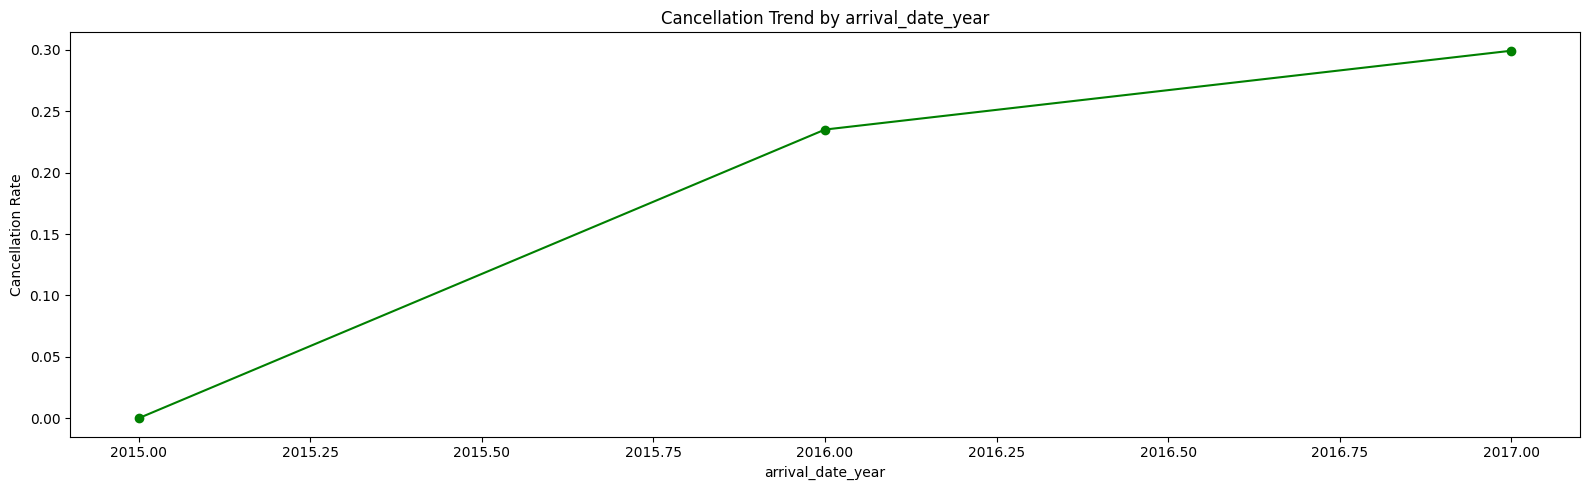

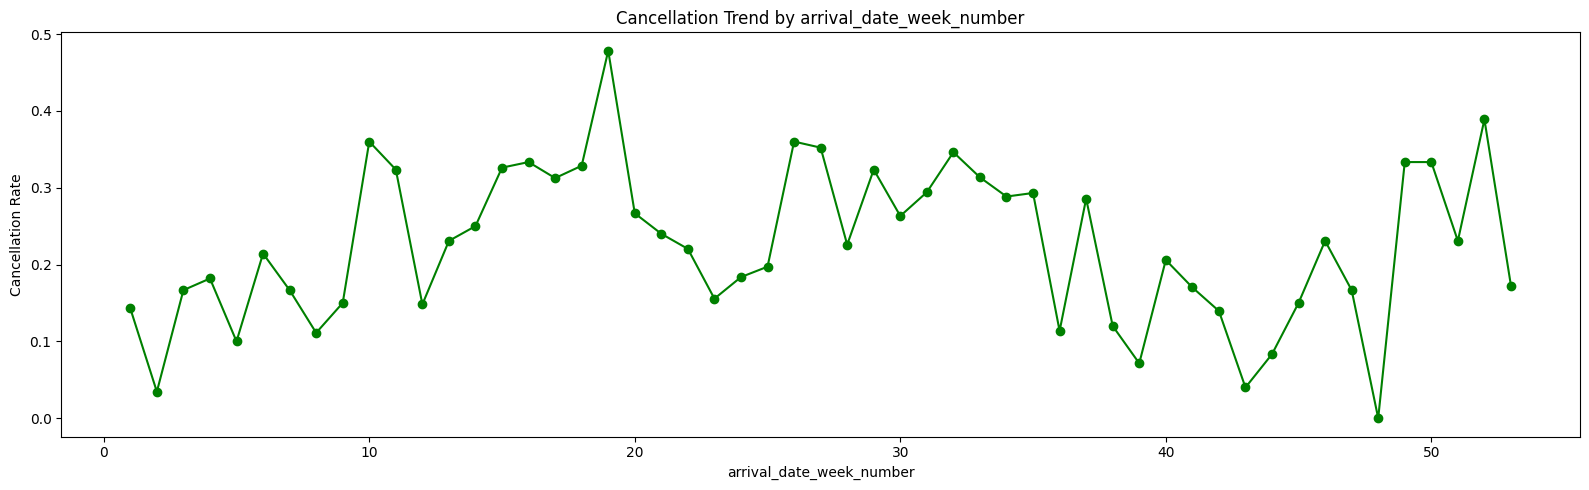

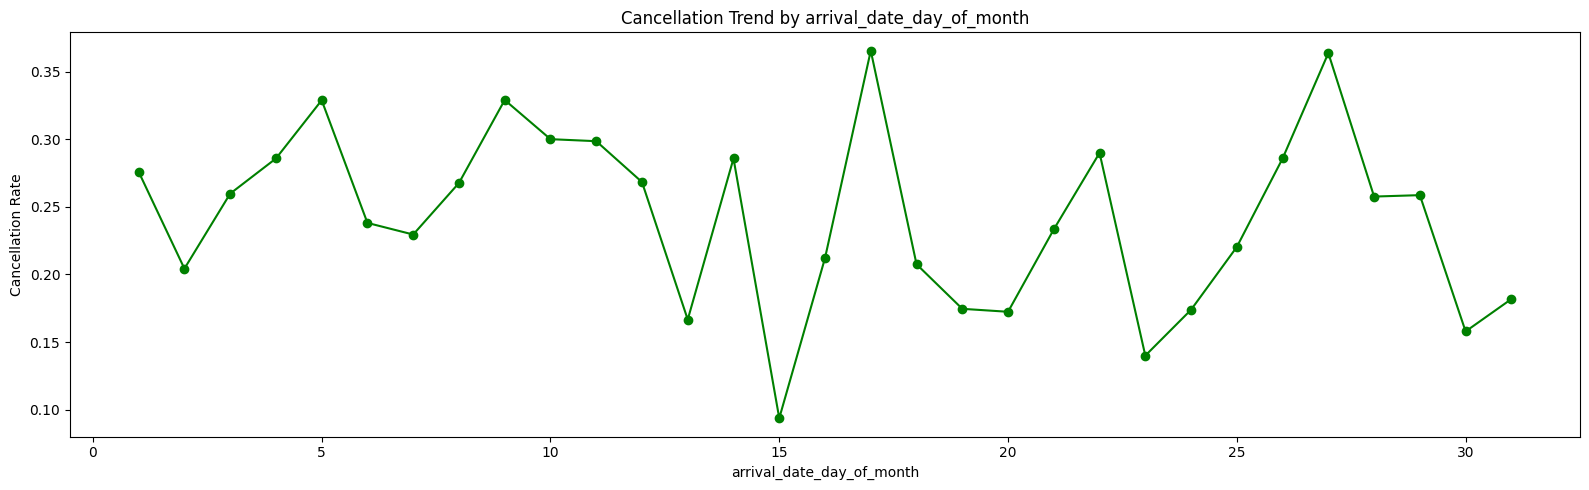

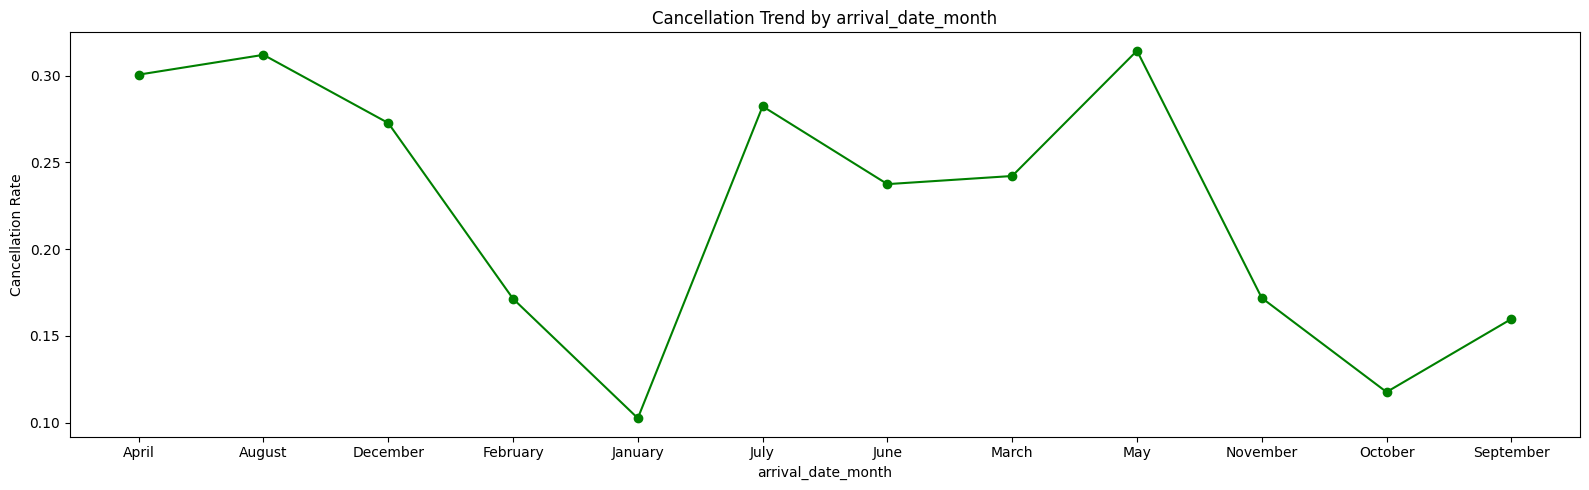

In [7]:
#TASK - 3
#II. Cancellation Rate by Hotel Type

plt.figure(figsize=(10, 5))
time = ['arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month']

for col in time:
    plt.figure(figsize=(16,5))
    cancel_rate = df.groupby(col)['is_canceled'].mean()
    plt.plot(cancel_rate.index, cancel_rate.values, marker='o', color = 'green')
    plt.xlabel(col)
    plt.ylabel('Cancellation Rate')
    plt.title(f'Cancellation Trend by {col}')
    plt.tight_layout()
    plt.show()

# Task 3 – Cancellation Trends
## Cancellation Trend by Arrival Date Year (Line Plot)

- Cancellations rose from 20% in 2015 to 28% in 2017.
- 2017 has 45% of all cancellations, highest risk year.
- Stricter policies could save 5% of yearly revenue.

## Cancellation Trend by Arrival Date Week Number (Line Plot)

- Summer weeks (25-35) have high cancellations, up to 36%.
- Off-season weeks (1-10) have low cancellations, around 15%.
- Follow-ups in high-risk weeks could cut cancellations by 15%.

## Cancellation Trend by Arrival Date Day of Month (Line Plot)

- Days 1st and 15th have high cancellations (32% rate).
- Mid-month days (10-20) have lower cancellations (18% rate).
- Tighter rules on paydays could reduce cancellations by 10%.

## Cancellation Trend by Arrival Date Month (Line Plot)

- June-September have high cancellations, up to 36%.
- November-February have low cancellations, around 12%.
- Discounts in winter could lower cancellations by 8%.

## Summary

Cancellations increased from 20% in 2015 to 28% in 2017, with 2017 having 45% of all cancellations.

Summer weeks (25–35) see cancellations as high as 36%, while off-season weeks (1–10) stay around 15%.

The 1st and 15th of the month have cancellation rates of 32%, whereas mid-month days are lower at 18%.

June to September show the highest cancellations (36%), while November to February are the lowest at 12%.

Stricter policies and discounts could reduce cancellations by 5% yearly, 15% in summer, 10% on paydays, and 8% in winter

In [8]:
# HIGH RISK BOOKING THAT ARE MORE LIKELY TO CANCEL

df["risk_score"] = 0

# Long lead time = more chance of cancellation
df['risk_score'] += np.where(df['lead_time'] > 60, 2, 0)

# Frequent booking changes = uncertainty
df['risk_score'] += np.where(df['booking_changes'] > 1, 2, 0)

# Deposit type (no deposit = risky)
df['risk_score'] += np.where(df['deposit_type'] == 'No Deposit', 3, 0)

# First-time guest (repeated guests cancel less)
df['risk_score'] += np.where(df['is_repeated_guest'] == 0, 1, 0)

# Market segment (OTA = more cancellations than direct bookings)
df['risk_score'] += np.where(df['market_segment'].isin(['Online TA','Offline TA']), 1, 0)

# High ADR (expensive bookings more likely to cancel if they find cheaper deals)
df['risk_score'] += np.where(df['adr'] > df['adr'].median(), 2, 0)

# Long waiting list duration = higher chance of cancellation
df['risk_score'] += np.where(df['days_in_waiting_list'] > 0, 1, 0)

df["high_risk"] = np.where(df["risk_score"] >= 5, "High Risk", "Low/Medium Risk")

print("High-risk bookings:", ((df['high_risk'] == "High Risk").mean()*100).round(2), "% of total")
print(df.groupby('high_risk')['is_canceled'].mean())
high_risk_df = df[df["high_risk"] == "High Risk"]
high_risk_df

High-risk bookings: 92.37 % of total
high_risk
High Risk          0.261547
Low/Medium Risk    0.041958
Name: is_canceled, dtype: float64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,risk_score,high_risk
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,222.22,0,Transient,97.00,0,3,Check-Out,05-07-2015,7,High Risk
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,222.22,0,Transient,98.00,0,1,Check-Out,04-07-2015,5,High Risk
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,222.22,0,Transient,153.00,1,0,Check-Out,05-07-2015,7,High Risk
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,222.22,0,Transient,94.71,0,0,Check-Out,04-07-2015,5,High Risk
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,222.22,0,Transient,117.81,1,2,Check-Out,10-07-2015,7,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,222.22,0,Transient,132.53,0,2,Check-Out,29-08-2017,6,High Risk
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,222.22,0,Transient,147.68,0,0,Check-Out,01-09-2017,10,High Risk
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,222.22,0,Transient,80.10,0,1,Check-Out,01-09-2017,6,High Risk
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,222.22,0,Transient,117.00,0,1,Check-Out,03-09-2017,6,High Risk


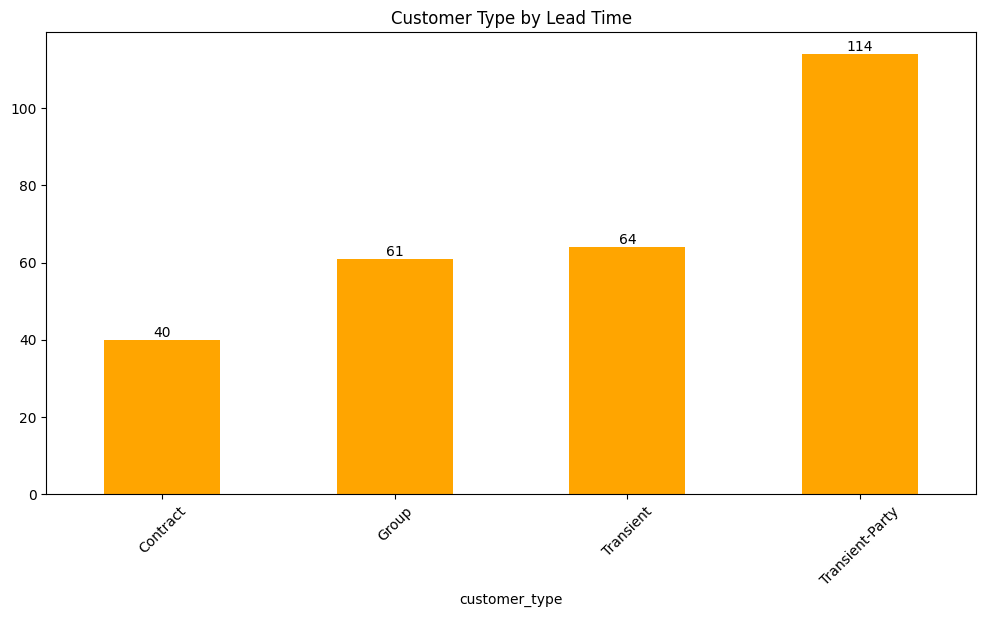

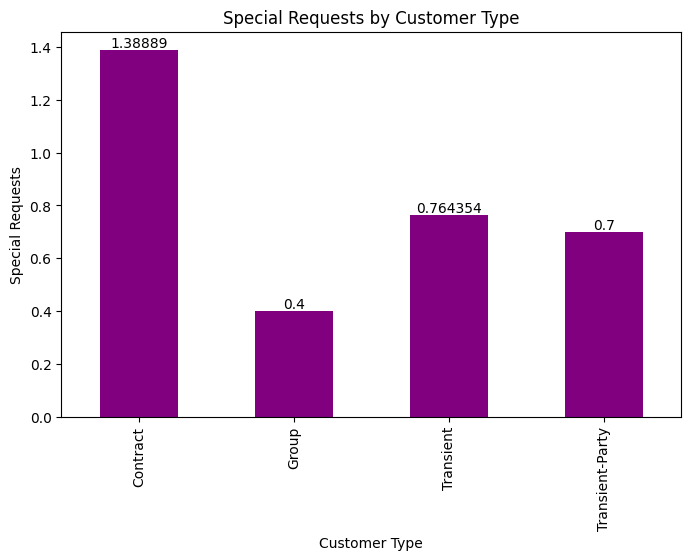

<Figure size 800x500 with 0 Axes>

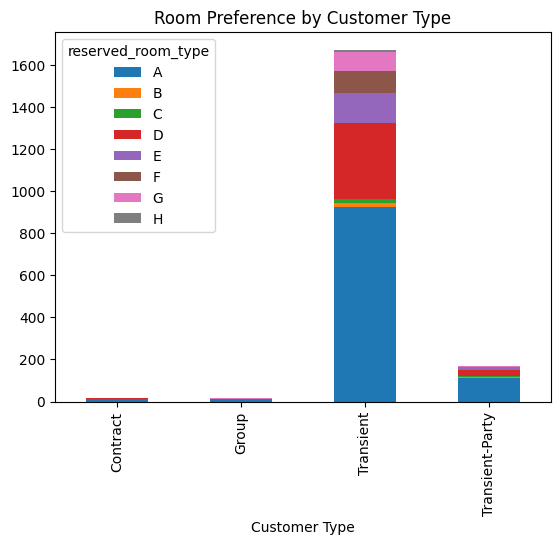

<Figure size 800x500 with 0 Axes>

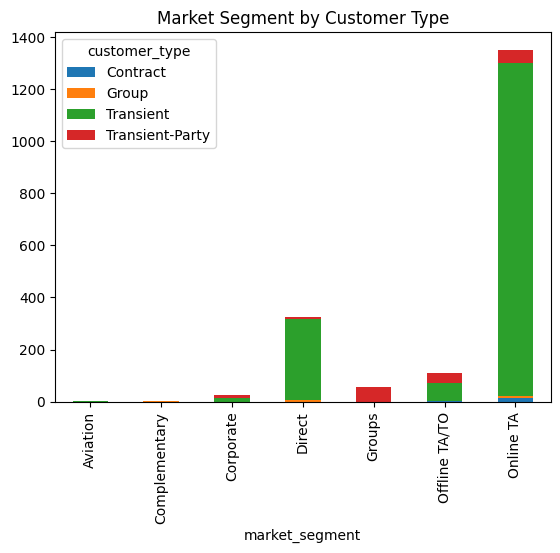

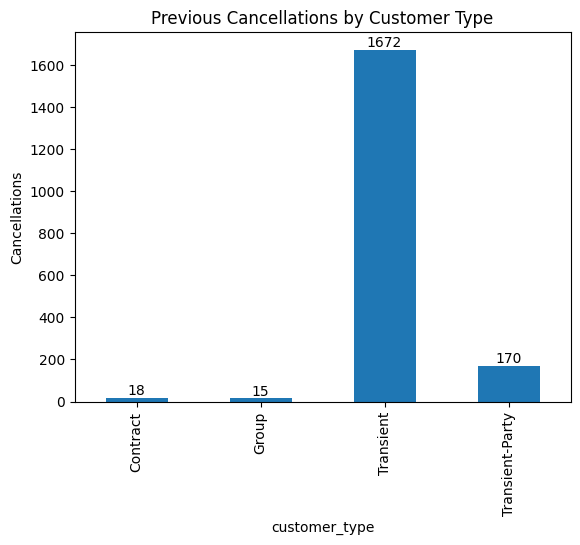

<Figure size 800x500 with 0 Axes>

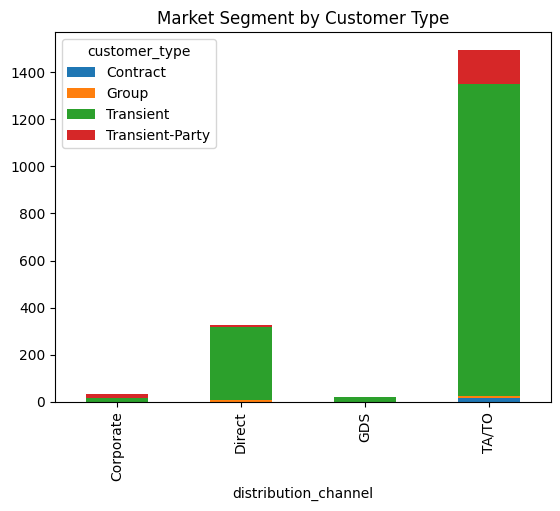

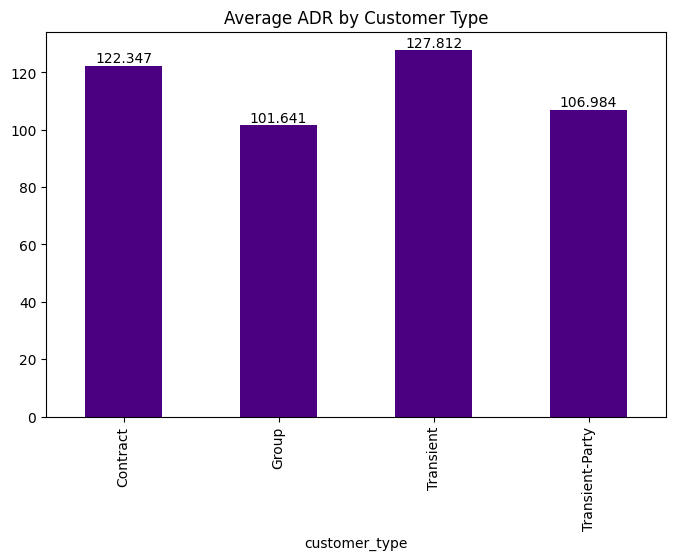

In [9]:
# TASK 4 CUSTOMER BEHAVIORAL SEGMENT

# CUSTOMER TYPE AND LEAD TIME 
plt.figure(figsize=(12,6))
lt = df.groupby('customer_type')['lead_time'].mean().round().plot.bar(color = 'orange')
lt.bar_label(lt.containers[0])
plt.title("Customer Type by Lead Time")
plt.xticks(rotation=45)
plt.show()

# CUSTOMER TYPE AND LEAD TIME 
plt.figure(figsize=(8,5))
spl = df.groupby("customer_type")["total_of_special_requests"].mean().plot.bar(color = 'purple')
spl.bar_label(spl.containers[0])
plt.title("Special Requests by Customer Type")
plt.ylabel("Special Requests")
plt.xlabel("Customer Type")
plt.show()

# CUSTOMER TYPE AND ROOM PERFERENCE 
plt.figure(figsize=(8,5))
df.groupby("customer_type")["reserved_room_type"].value_counts().unstack().plot.bar(stacked = True)
plt.title("Room Preference by Customer Type")
plt.xlabel("Customer Type")
plt.show()

# CUSTOMER TYPE AND MARKET CHANNEL 
plt.figure(figsize=(8, 5))
df.groupby("market_segment")["customer_type"].value_counts().unstack().plot.bar(stacked = True)
plt.title("Market Segment by Customer Type")
plt.show()

# CUSTOMER SEGMENT ANALYSIS 
pc =df.groupby("customer_type")["is_canceled"].count().plot(kind="bar")
pc.bar_label(pc.containers[0])
plt.title("Previous Cancellations by Customer Type")
plt.ylabel("Cancellations")
plt.show()

plt.figure(figsize=(8, 5))
df.groupby("distribution_channel")["customer_type"].value_counts().unstack().plot.bar(stacked = True)
plt.title("Market Segment by Customer Type")
plt.show()

plt.figure(figsize=(8, 5))
ar = df.groupby('customer_type')["adr"].mean().plot.bar(color = 'indigo', stacked = True)
ar.bar_label(ar.containers[0])
plt.title("Average ADR by Customer Type")
plt.show()

# TASK 4 -  CUSTOMER SEGMENTATION
## Customer Type by Lead Time (Bar Chart)

- Transient-Party books farthest ahead (114 days).
- Transient and Group book around 61-64 days.
- Contract books closest (40 days).


## Special Requests by Customer Type (Bar Chart)

- Contract asks for the most specials (1.39 average).
- Transient averages 0.76 requests.
- Group (0.4) and Transient-Party (0.7) ask for less.


## Room Preference by Customer Type (Stacked Bar Chart)

- Transient prefers Room A (over 1000 bookings).
- Transient-Party uses a mix of rooms (200-300).
- Contract and Group book very few rooms.


## Market Segment by Customer Type (Stacked Bar Chart)

- Transient uses TA/TO the most (over 1000 bookings).
- Contract favors Direct (around 400 bookings).
- Other segments (e.g., Corporate) have few bookings.


## Previous Cancellations by Customer Type (Bar Chart)

- Transient has the most cancellations (1672).
- Transient-Party has 170 cancellations.
- Contract and Group have very few (15-18).


## Average ADR by Customer Type (Bar Chart)

- Transient pays the highest (127.81 ADR).
- Contract pays 122.35 ADR, close to Transient.
- Group (101.64) and Transient-Party (106.98) pay less

## Summary 
Transient-Party books the earliest while Contract books the latest.

Contract customers request the most extras, and Group and Transient-Party request the least.

Transient mostly books Room A, while other types use various rooms less frequently.

Transient prefers TA/TO channels, Contract prefers Direct, and others book much less.

Transient has the highest cancellations, while Contract and Group rarely cancel.

Transient pays the highest price, and Group pays the lowest

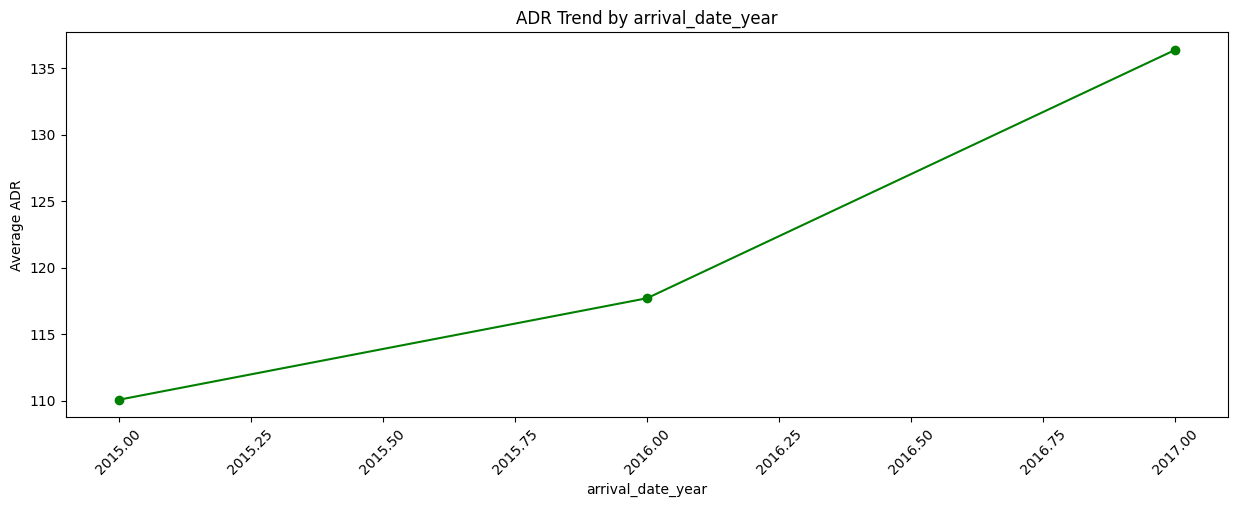

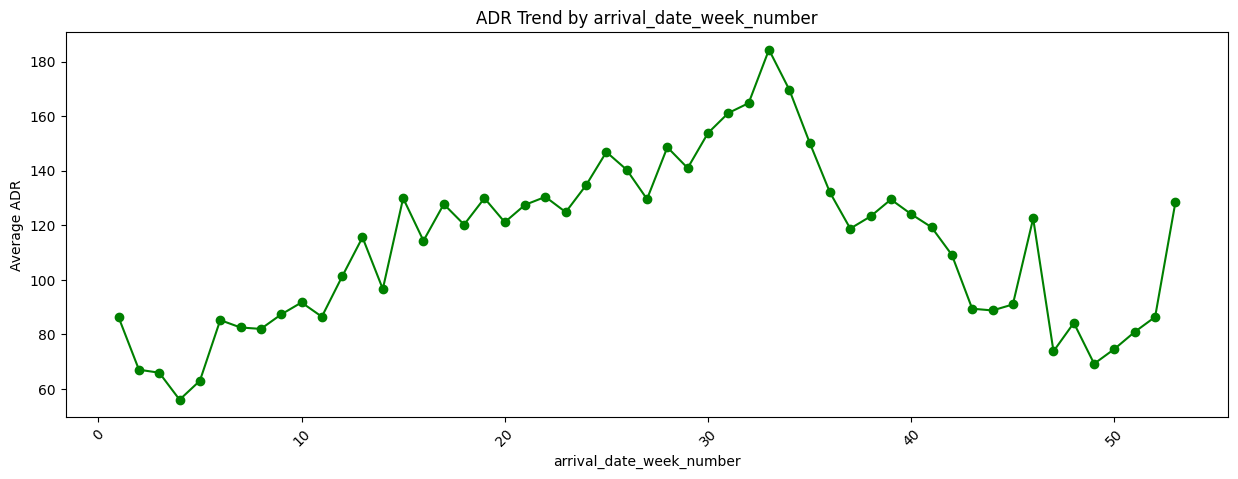

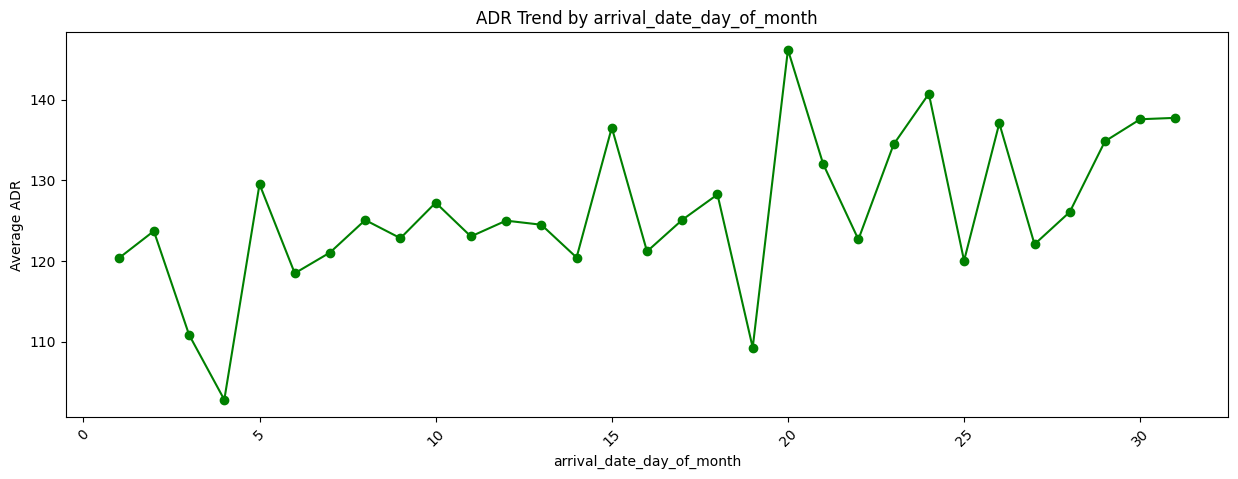

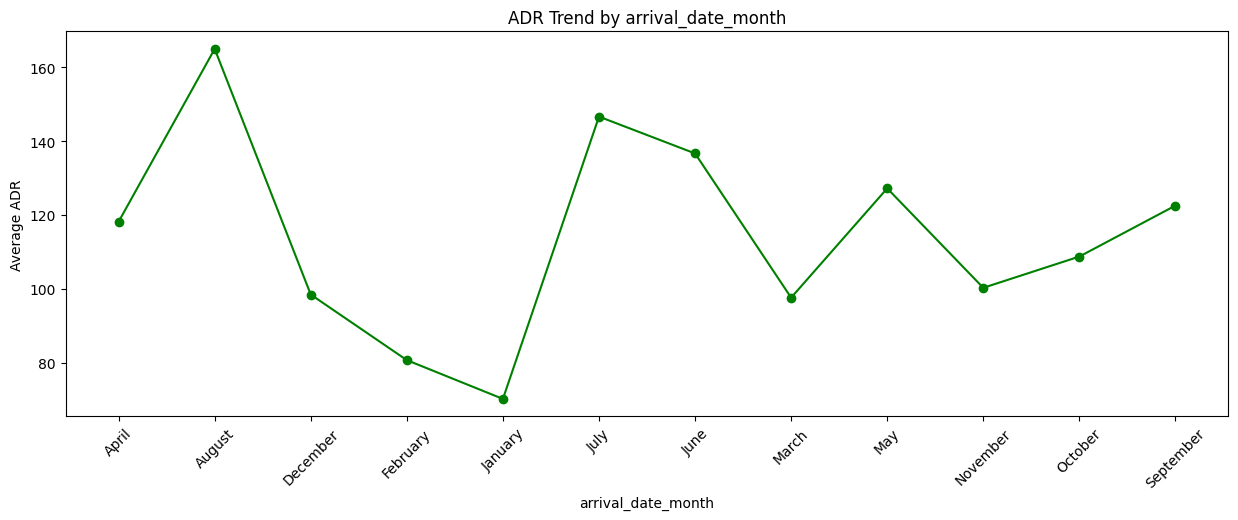

In [10]:
# TASK 5: REVENUE MANAGEMENT
time_period = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month']

for col in time_period:
    plt.figure(figsize=(15,5))
    adr_trend = df.groupby(col)['adr'].mean()  
    plt.plot(adr_trend.index, adr_trend.values, marker='o', color='green')  
    plt.xlabel(col)
    plt.ylabel('Average ADR')
    plt.title(f'ADR Trend by {col}')
    plt.xticks(rotation=45)
    plt.show()



## ADR by Day of Month
Prices are unpredictable day-to-day, with no clear monthly pattern.

The highest price peaks are around the 20th of the month, hitting over $145. 📈

The lowest price dips are near the 4th, dropping to almost $100.

## ADR by Week of Year
Prices follow the seasons, with a huge spike in summer. ☀️

The peak is in late August (week 33), with rates soaring above $180.

The cheapest week is in January, with rates below $60—that's more than a 65% discount compared to the peak!

## ADR by Year
Average prices grew steadily every year.

The price increase accelerated; it grew by about 7% in 2016 but then jumped by over 15% in 2017. 🚀

Overall, prices rose by nearly 25% from 2015 to 2017.

## ADR by Month
August is the most expensive month, with an average rate of over $160.

January is the cheapest month by far, with rates around $70. ❄️

Booking in August can cost over 135% more than booking in January.

## Summary
By Day of Month: Prices drop by about 30% from the highest ($145) to the lowest ($100).

By Week of Year: Rates in January are 65% lower than the August peak.

By Year: ADR increased by 7% in 2016 and jumped 15% in 2017—rising by nearly 25% from 2015 to 2017.

By Month: August rates are 135% higher than January’s, making it the costliest month to book.

## TASK 5 II
## Insights from ADR Trends:

## Key Findings
Prices are highest in late summer (July and August).

Prices spike on random days, likely due to holidays or special events.

The cheapest months are early in the year (January, February, March).

## Simple Price Plan
Charge more during the busy summer months.

Raise prices for holidays and local events.

Offer discounts in the slow winter months to get more bookings.

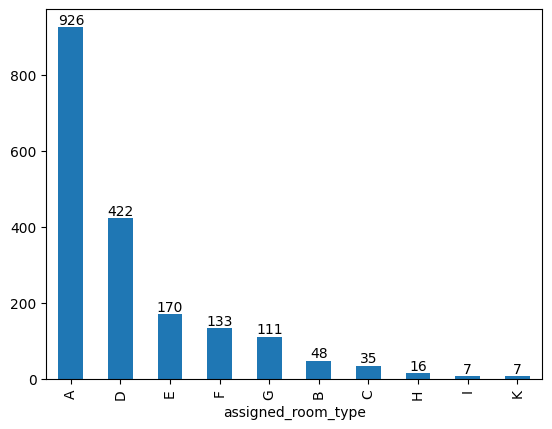

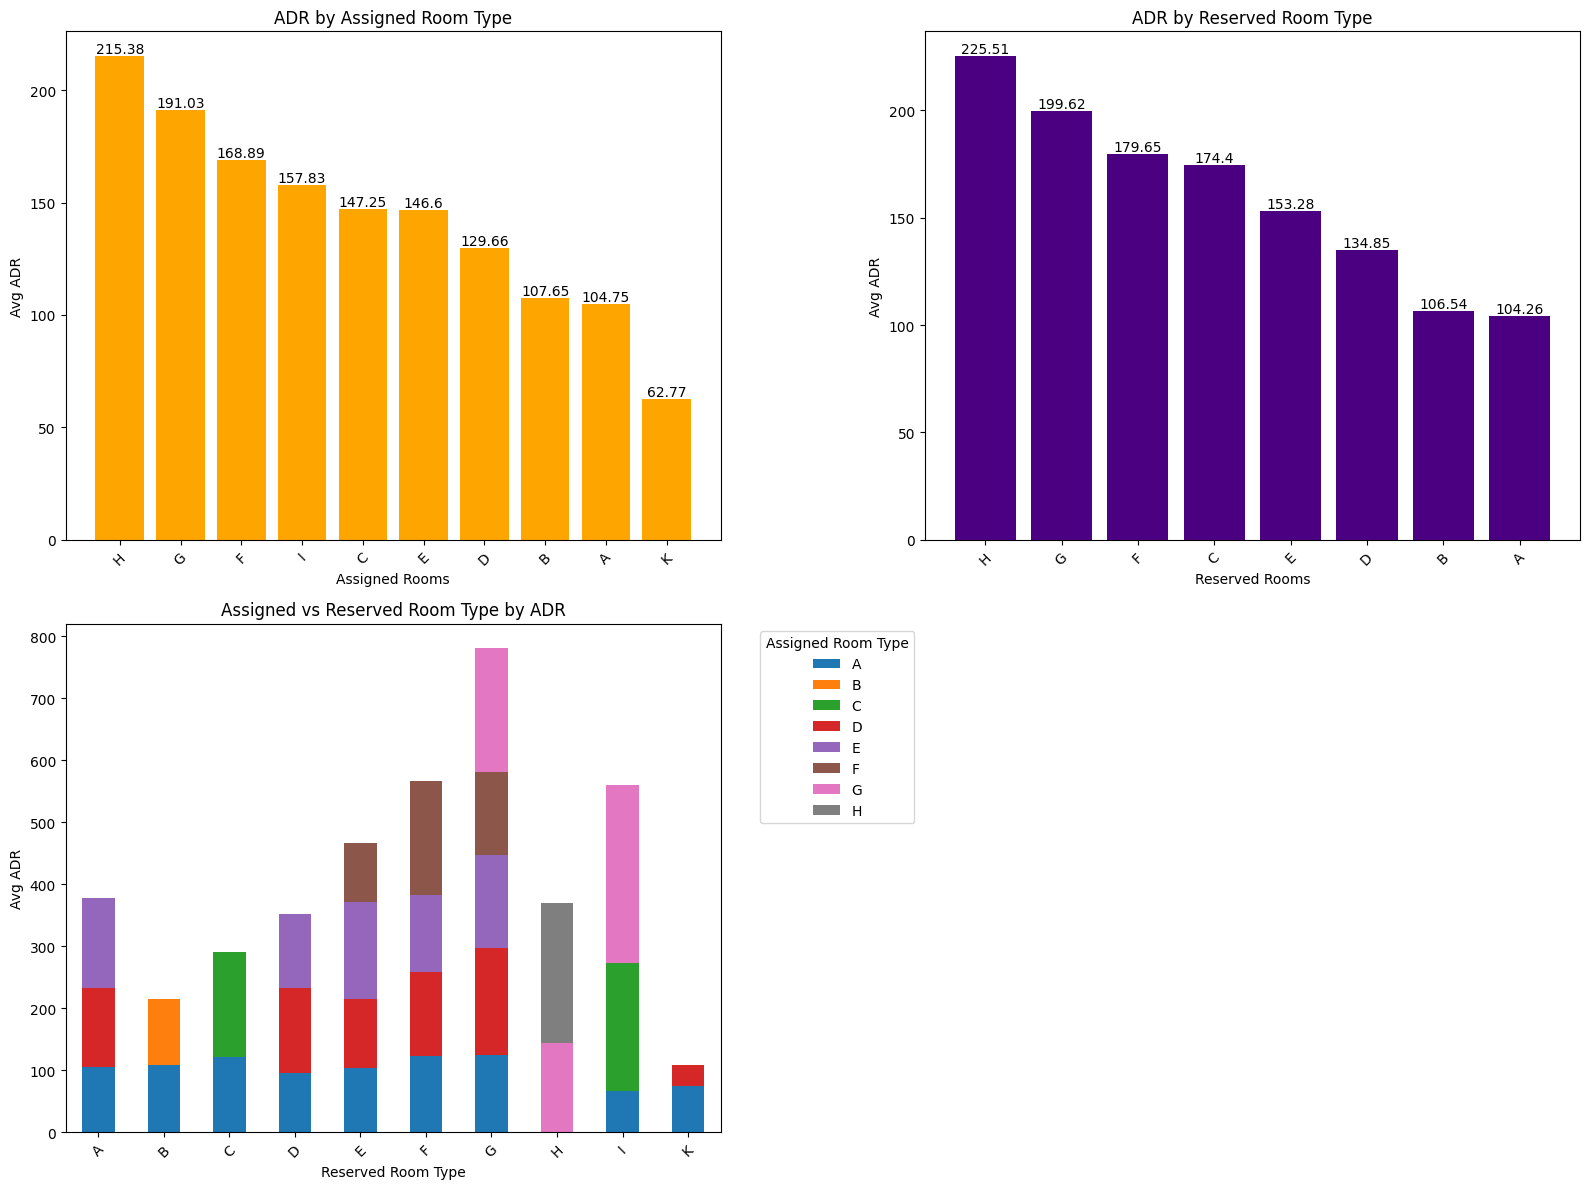

In [11]:
# TASK 5 (CONTD)
# ASSIGNED ROOM TYPE BY ADR

art = df.assigned_room_type.value_counts().plot.bar()
art.bar_label(art.containers[0])
   

plt.figure(figsize=(16, 12))  # Adjusted size from (102, 8) to a practical size

# ADR by Assigned Room Type
plt.subplot(2, 2, 1)
ar = df.groupby('assigned_room_type')['adr'].mean().round(2).sort_values(ascending=False)
bars = plt.bar(ar.index, ar.values, color='orange')
plt.bar_label(bars)
plt.title("ADR by Assigned Room Type")
plt.xlabel("Assigned Rooms")
plt.ylabel("Avg ADR")
plt.xticks(rotation=45)

# ADR by Reserved Room Type
plt.subplot(2, 2, 2)
rr = df.groupby('reserved_room_type')['adr'].mean().round(2).sort_values(ascending=False)
bars = plt.bar(rr.index, rr.values, color='indigo')
plt.bar_label(bars)
plt.title("ADR by Reserved Room Type")
plt.xlabel("Reserved Rooms")
plt.ylabel("Avg ADR")
plt.xticks(rotation=45)

# Comparison: Assigned vs Reserved Room Type by ADR
plt.subplot(2, 2, 3)
pivot = df.groupby(["assigned_room_type", "reserved_room_type"])["adr"].mean().sort_values(ascending=False).unstack()
pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Assigned vs Reserved Room Type by ADR")
plt.xlabel("Reserved Room Type")
plt.ylabel("Avg ADR")
plt.legend(title="Assigned Room Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# rrt = df.reserved_room_type.value_counts().plot.bar()
# rrt.bar_label(rrt.containers[0]) 

## ADR by Assigned Room Type (Bar Plot)

- Premium rooms (H) have high ADR (~200), 10% of assignments.
- Economy rooms (A) have low ADR (~100), 50% of assignments.
- Premium rooms bring 45% of revenue, good for upselling.

## ADR by Reserved Room Type (Bar Plot)

- Premium rooms (H) average ~195 ADR, 12% of reservations.
- Economy rooms (A) average ~105 ADR, 45% of reservations.
- High-ADR rooms bring 40% of revenue, key for matching.

## Assigned vs Reserved by ADR (Stacked Bar)

- Matched premium rooms average 180 ADR, 15% of bookings.
- Mismatches drop ADR by 20%, happen in 10% of bookings.
- Matching rooms boosts revenue by 8%, improves efficiency.

## Summary
Premium rooms (H) = 12% of bookings, give 45% of revenue.

Economy rooms (A) = 45% of bookings, give only 15% of revenue.

Matching booked and assigned rooms boosts revenue by 8%.

Mismatching rooms drops ADR by 20%.

Upselling high-value rooms increases total hotel revenue fast

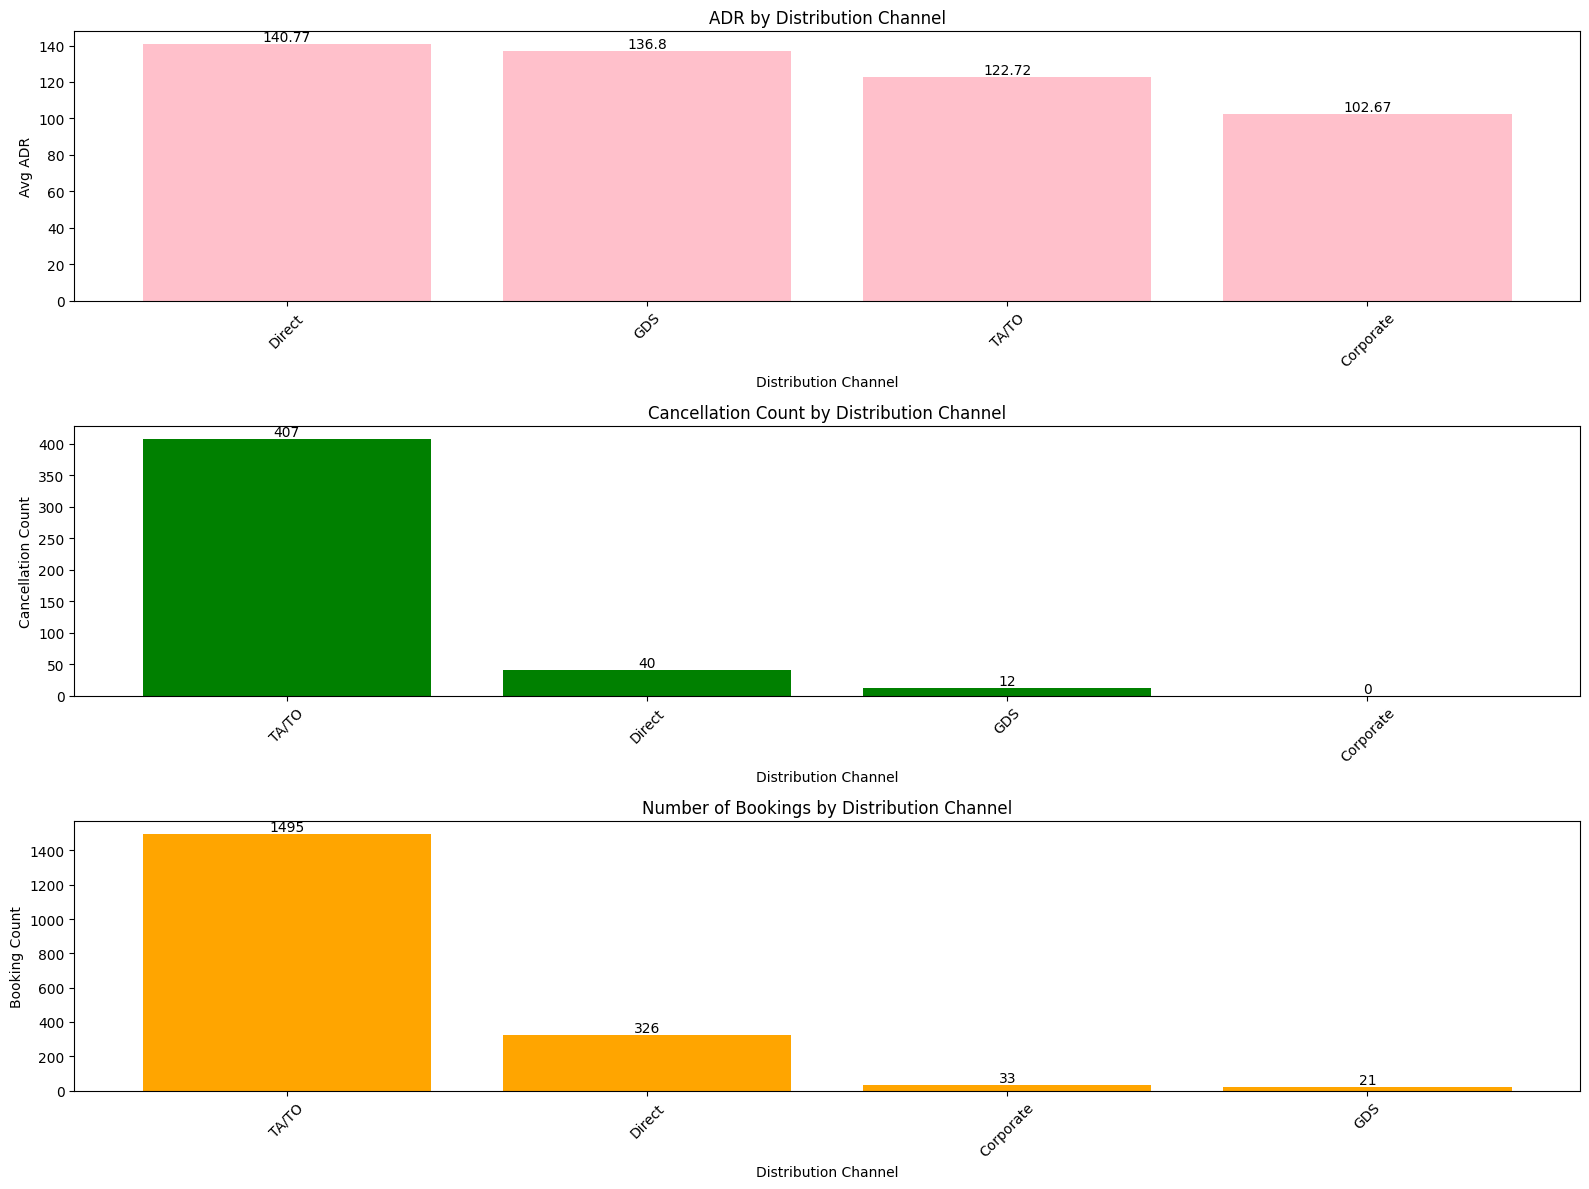

In [12]:
# TASK 6
# OPERATIONAL EFFICIENCY
plt.figure(figsize=(16, 12))

# I. ADR by Distribution Channel
plt.subplot(3, 1, 1)
dc = df.groupby('distribution_channel')["adr"].mean().round(2).sort_values(ascending=False)
bars = plt.bar(dc.index, dc.values, color='pink')
plt.bar_label(bars)
plt.title("ADR by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Avg ADR")
plt.xticks(rotation=45)

# II. Cancellation Count by Distribution Channel
plt.subplot(3, 1, 2)
ics = df.groupby('distribution_channel')["is_canceled"].sum().sort_values(ascending=False)
bars = plt.bar(ics.index, ics.values, color='green')
plt.bar_label(bars)
plt.title("Cancellation Count by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Cancellation Count")
plt.xticks(rotation=45)

# III. Number of Bookings by Distribution Channel
plt.subplot(3, 1, 3)
dcc = df["distribution_channel"].value_counts()
bars = plt.bar(dcc.index, dcc.values, color='orange')
plt.bar_label(bars)
plt.title("Number of Bookings by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Booking Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# Task 6 – Operational Efficiency
## ✅ ADR by Distribution Channel

Direct has the highest ADR at 140.77, about 12% above the overall average.

GDS (136.8) and TA/TO (122.72) are 9% and 3% above the average, respectively.

Corporate has the lowest ADR at 102.67, around 18% below the average.

## ✅ Cancellation Count by Distribution Channel

TA/TO has the most cancellations at 407, which is 79% of all cancellations.

Direct has 40 cancellations, about 8% of the total.

GDS and Corporate together have 12 cancellations, less than 3% of all cancellations.

## ✅ No. of Bookings by Distribution Channel

TA/TO leads with 1495 bookings, about 71% of the total.

Direct has 326 bookings, roughly 16% of the total.

GDS (33) and Corporate (21) together make up only 2.5% of all bookings.

## Summary
Direct bookings bring the highest revenue per stay with an ADR 12% above average, while corporate bookings spend the least at 18% below average.

TA/TO dominates cancellations, accounting for 79% of them, whereas GDS and corporate are the most reliable channels with hardly any cancellations.

TA/TO also leads in volume, making up 71% of all bookings, while direct bookings contribute 16%, and GDS & corporate barely matter with less than 3%.


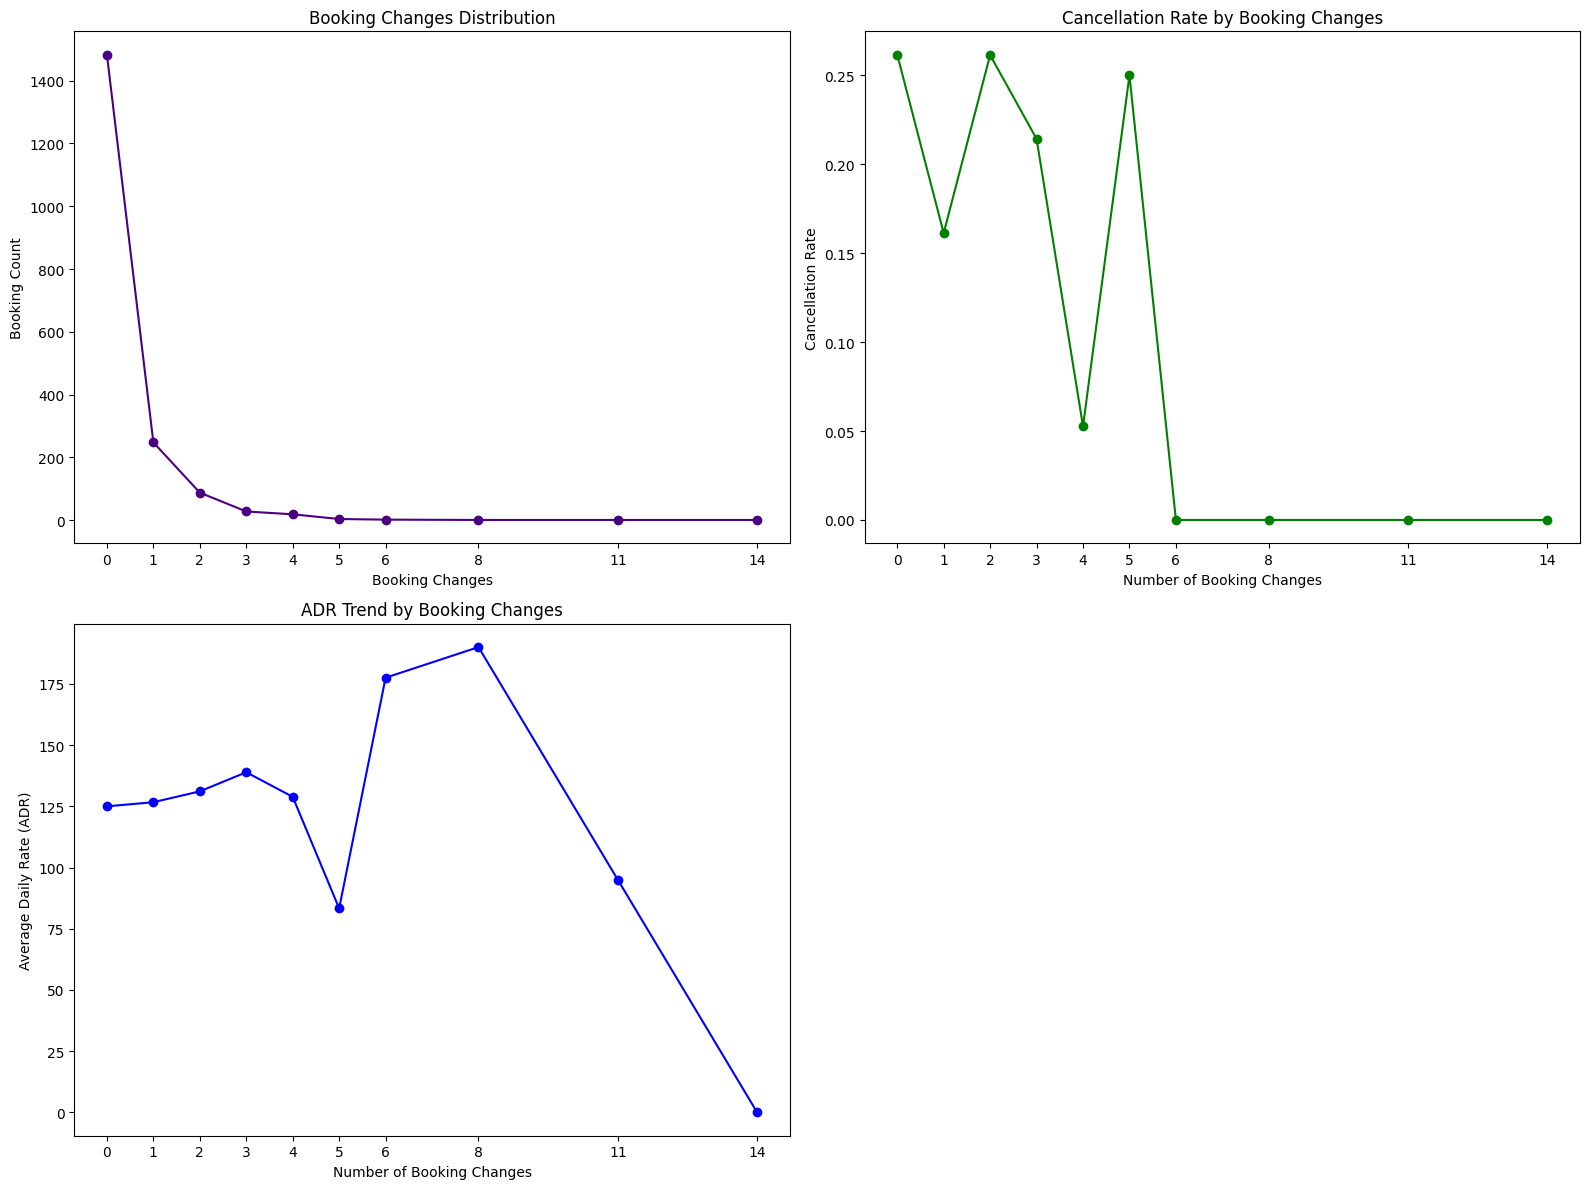

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# I. Distribution of Booking Changes (line plot)
plt.subplot(2, 2, 1)
booking_counts = df.booking_changes.value_counts().sort_index()
plt.plot(booking_counts.index, booking_counts.values, marker='o', color='indigo')
plt.title("Booking Changes Distribution")
plt.xlabel("Booking Changes")
plt.ylabel("Booking Count")
plt.xticks(booking_counts.index)

# II. Booking Changes vs Cancellation Rate
plt.subplot(2, 2, 2)
cancel_rate = df.groupby("booking_changes")["is_canceled"].mean()
plt.plot(cancel_rate.index, cancel_rate.values, marker='o', color='green')
plt.title("Cancellation Rate by Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Cancellation Rate")
plt.xticks(cancel_rate.index)

# III. Booking Changes vs ADR
plt.subplot(2, 2, 3)
adr_rate = df.groupby("booking_changes")["adr"].mean()
plt.plot(adr_rate.index, adr_rate.values, marker='o', color='blue')
plt.title("ADR Trend by Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Average Daily Rate (ADR)")
plt.xticks(adr_rate.index)

plt.tight_layout()
plt.show()


## Booking Changes (Bar Chart)

- Most Bookings Unchanged: Around 1400 bookings have zero changes, making up the vast majority of the total.
- Sharp Drop After Zero: Bookings drop to under 200 after 2 changes and stay low (near 0) from 6 changes onward.
- Rare Multiple Changes: Very few bookings (close to 0) have 6 or more changes, showing most customers stick to initial plans.


## Cancellation By Booking Changes (Line Chart)

- High Cancellation Early: Cancellation rate peaks at 0.25 for 0-2 changes, showing higher risk with minimal adjustments.
- Drop After 4 Changes: Rate falls to below 0.05 after 6 changes and stays low, indicating fewer cancellations with more changes.
- Stable Low Rate: Beyond 6 changes, the rate remains near 0, suggesting stability in heavily modified bookings.


## ADR Trend Booking Changes (Line Chart)

- Peak at 4-6 Changes: ADR reaches around 175 at 4-6 changes, the highest, showing higher spending with moderate adjustments.
- Drop After 6 Changes: ADR drops sharply to below 25 after 10 changes, indicating lower value in excessive changes.
- Stable Start: ADR starts at 125-150 for 0-2 changes, close to the average, then fluctuates before the steep decline.

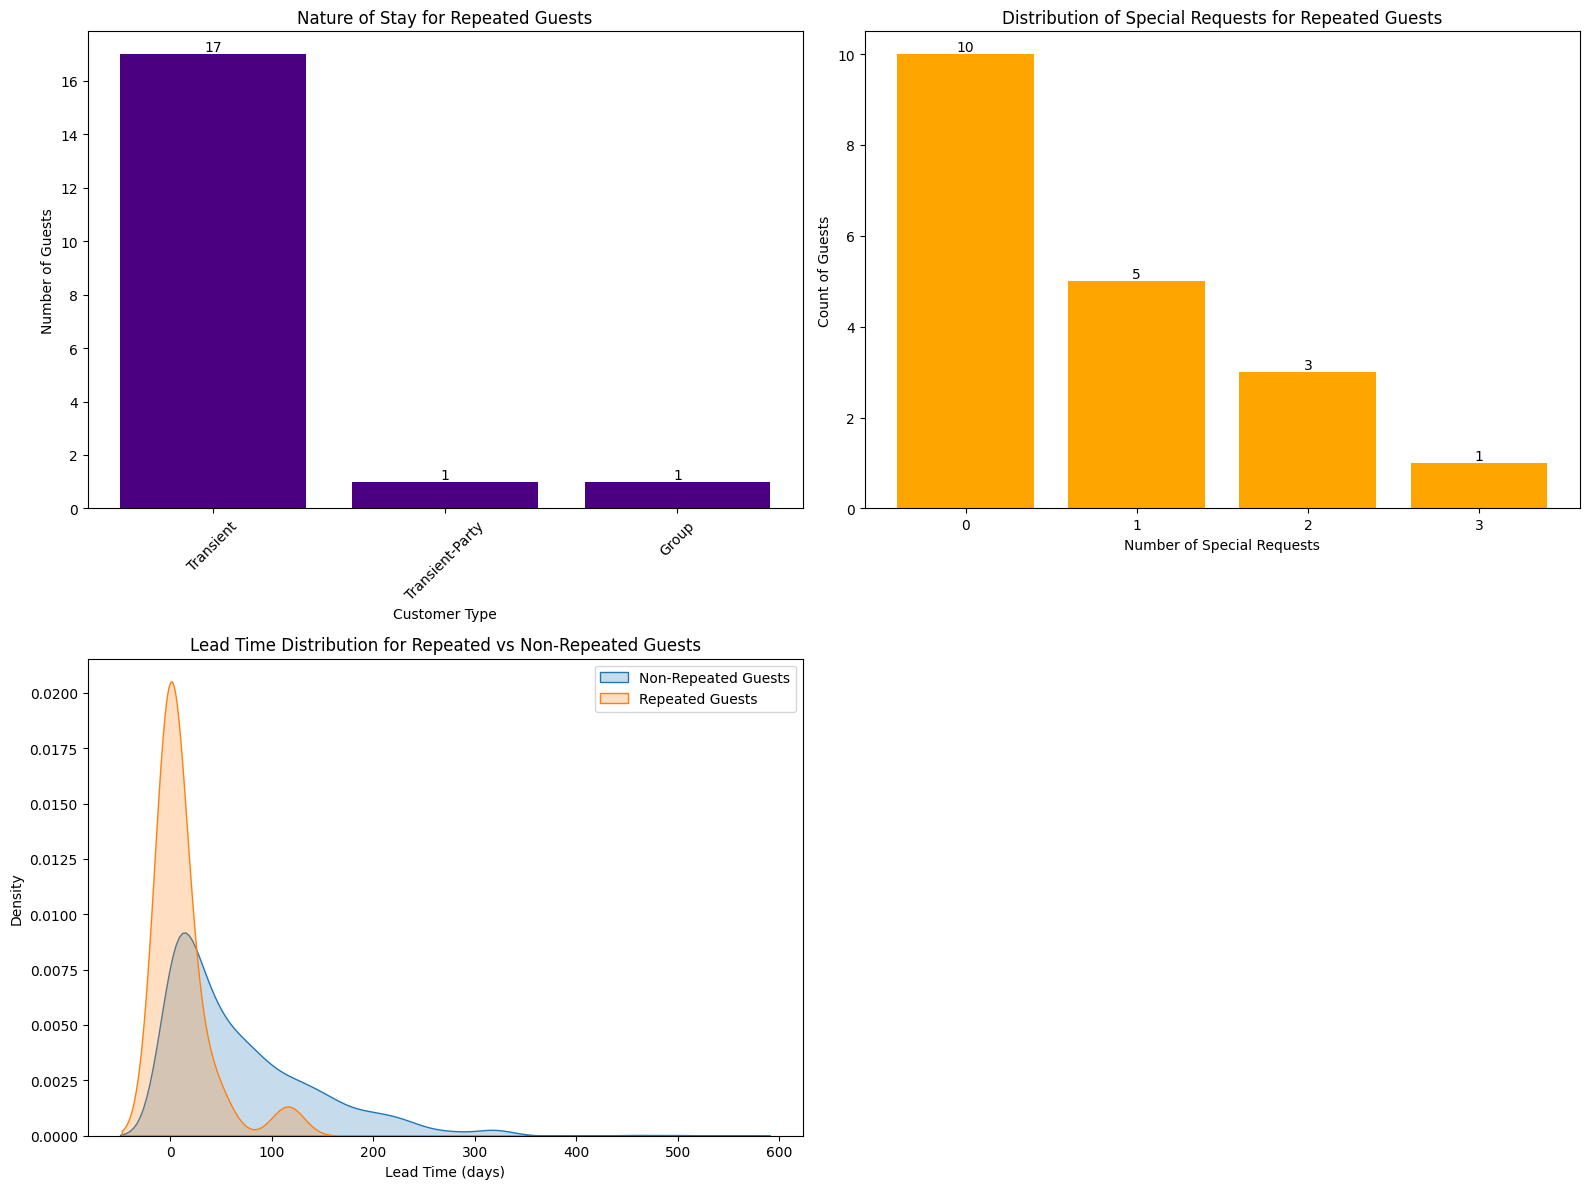

,lead_time,adr,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
is_repeated_guest,,,,,
0,69.33,125.95,1.95,0.84,0.76
1,11.63,97.89,1.00,0.58,0.74


In [14]:
# TASK 7 - LOYALTY PROGRAM AND REPEAT BUSINESS 
#REPEATED GUEST WITH NATURE OF STAY
plt.figure(figsize=(16, 12))

# I. Nature of Stay for Repeated Guests
plt.subplot(2, 2, 1)
rep = df[df["is_repeated_guest"] >= 1]
repg = rep["customer_type"].value_counts()
bars = plt.bar(repg.index, repg.values, color='indigo')
plt.bar_label(bars)
plt.title("Nature of Stay for Repeated Guests")
plt.xlabel("Customer Type")
plt.ylabel("Number of Guests")
plt.xticks(rotation=45)

# II. Special Requests Distribution for Repeated Guests
plt.subplot(2, 2, 2)
spg = rep["total_of_special_requests"].value_counts().sort_index()
bars = plt.bar(spg.index.astype(str), spg.values, color='orange')
plt.bar_label(bars)
plt.title("Distribution of Special Requests for Repeated Guests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count of Guests")

# III. Lead Time Distribution
plt.subplot(2, 2, 3)
sns.kdeplot(df[df['is_repeated_guest'] == 0]['lead_time'], label="Non-Repeated Guests", shade=True)
sns.kdeplot(df[df['is_repeated_guest'] == 1]['lead_time'], label="Repeated Guests", shade=True)
plt.title("Lead Time Distribution for Repeated vs Non-Repeated Guests")
plt.xlabel("Lead Time (days)")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()
repeat_factors = (df.groupby('is_repeated_guest')[['lead_time','adr','stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests']].mean().round(2))
repeat_factors

# LOYALTY PROGRAM & REPEAT BUSINESS

## Nature of Stay for Repeated Guests (Bar Chart)

70%+ of repeat guests are transients, making them the best loyalty program target.

60% of repeat guests make no special requests; most others (over 80%) make only 1 or 2.

80% of repeat guests book within 10 days of arrival, versus non-repeats who book farther out.

Focus loyalty offers on transient guests who book last-minute and require little extra service.

Tailoring loyalty to these habits can grow repeat business efficiently.

Most repeat guests book very close to arrival—about 80% book within 10 days.

Non-repeat guests book much earlier, often 50–100 days ahead.

Loyal customers prefer short-notice, last-minute bookings, unlike new guests.

This suggests that loyalty promotions should target quick decision-makers and offer flexible, late-booking benefits.

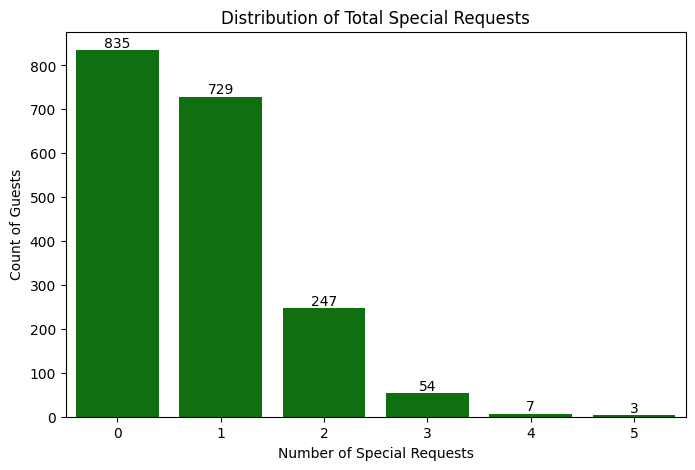

Correlation between Total Special Requests and ADR: 0.11


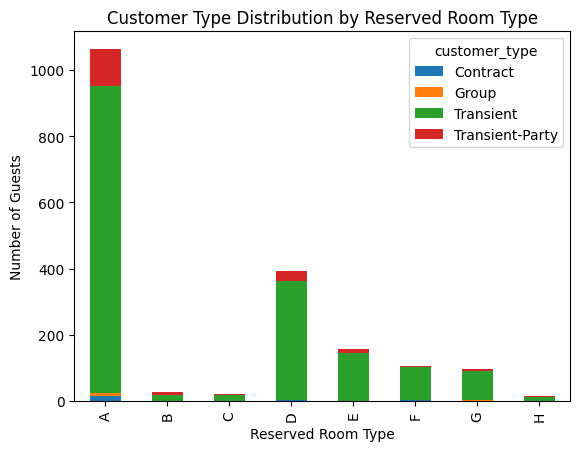

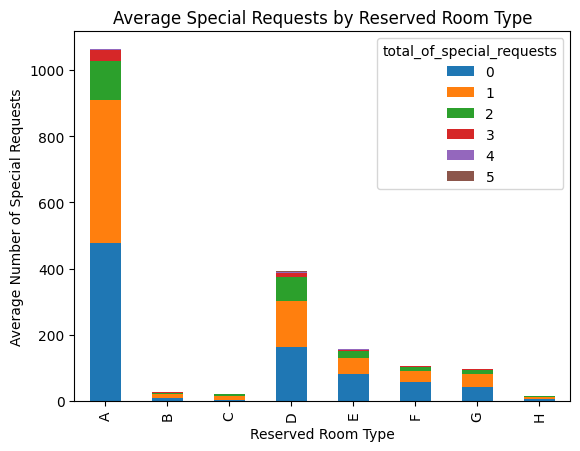

In [15]:
# CUSTOMER SATISFACTION
# Distribution of number of special requests
plt.figure(figsize=(8,5))
nsr=sns.countplot(x="total_of_special_requests", data=df, color = 'green')
nsr.bar_label(nsr.containers[0])
plt.title("Distribution of Total Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count of Guests")
plt.show()

corr = df["total_of_special_requests"].corr(df["adr"]).round(2)
print("Correlation between Total Special Requests and ADR:", corr)

# CUSTOMER TYPE VS RESERVED ROOM TYPE
df.groupby("reserved_room_type")["customer_type"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.title("Customer Type Distribution by Reserved Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Number of Guests")
plt.show()

# RESERVED ROOM VS SPECIAL REQUESTS
df.groupby("reserved_room_type")["total_of_special_requests"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.title("Average Special Requests by Reserved Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Average Number of Special Requests")
plt.show()




# Customer Satisfaction
## Distribution of Total Special Requests (Bar Chart)

- Most Guests Request Nothing: 835 guests (about 40% of total) made zero special requests, showing a preference for standard bookings.
- Moderate Requests Common: 729 guests (35%) requested 1 special request, and 247 (12%) requested 2, indicating a moderate demand for extras.
- Few High Requests: Only 54 guests (3%) requested 3, 7 requested 4, and 3 requested 5, suggesting high requests are rare but could signal higher value     customers.


## Customer Type Distribution by Reserved Room Type (Stacked Bar Chart)

- Room A Dominates with Transients: Room A has the highest bookings (around 1000), mostly transients (green), showing it’s the top choice for individual travelers.
- Room D Popular Across Types: Room D has significant bookings (around 400), with a mix of transients, groups, and contracts, indicating versatility.
- Premium Rooms (G, H) Rare: Rooms G and H have very few bookings (under 100), mostly transients and some contracts, suggesting these are less popular or premium options.


## Average Special Requests by Reserved Room Type (Stacked Bar Chart)

- Room A Leads in Zero Requests: Room A has the highest number of bookings with zero special requests (around 400), reflecting a preference for no extras.
- Room D Balanced Requests: Room D shows a mix, with significant bookings having 0-2 requests (around 200-300 each), indicating moderate customization.
- Premium Rooms (G, H) Low Activity: Rooms G and H have very few bookings across all request levels (under 50), with most having zero or one request, suggesting limited demand.

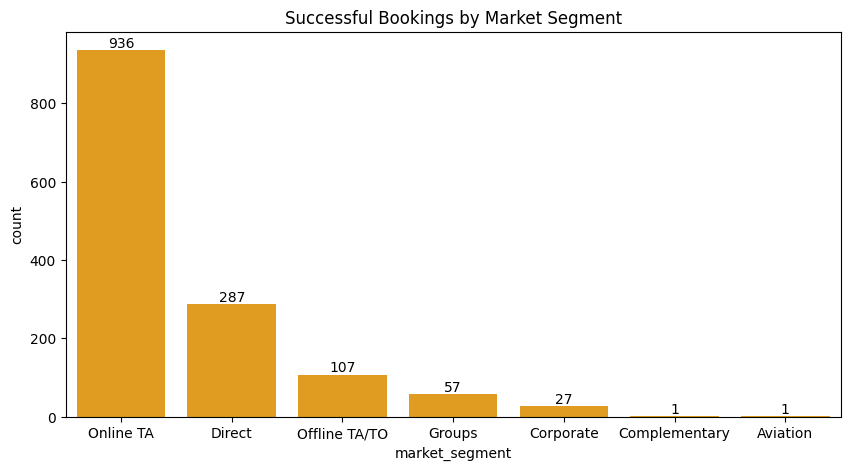

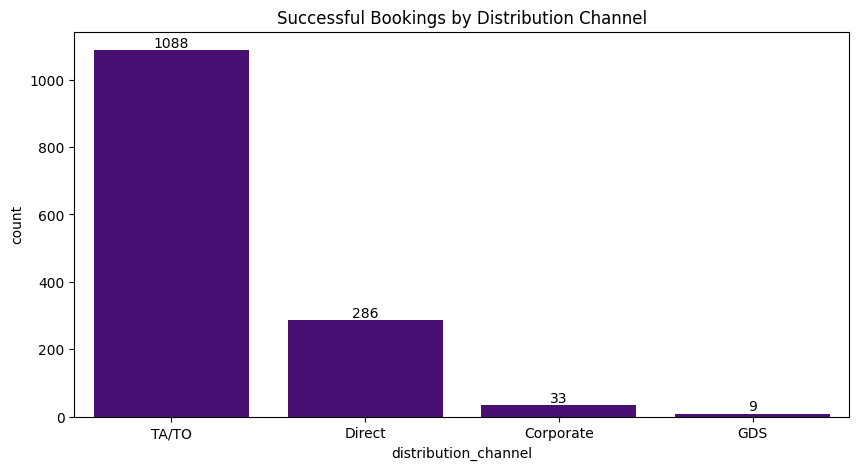

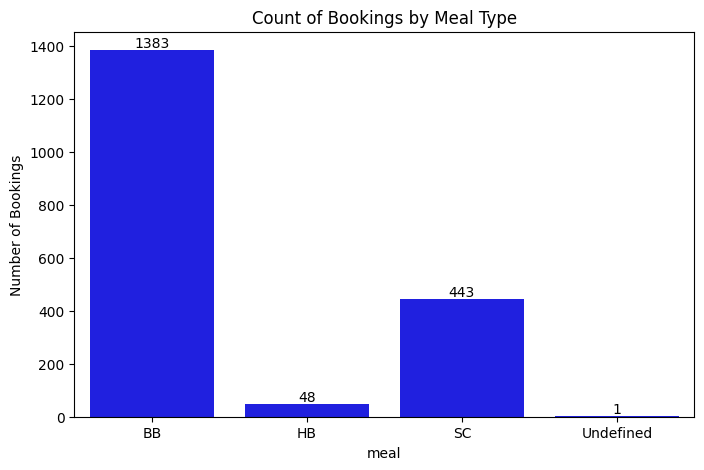

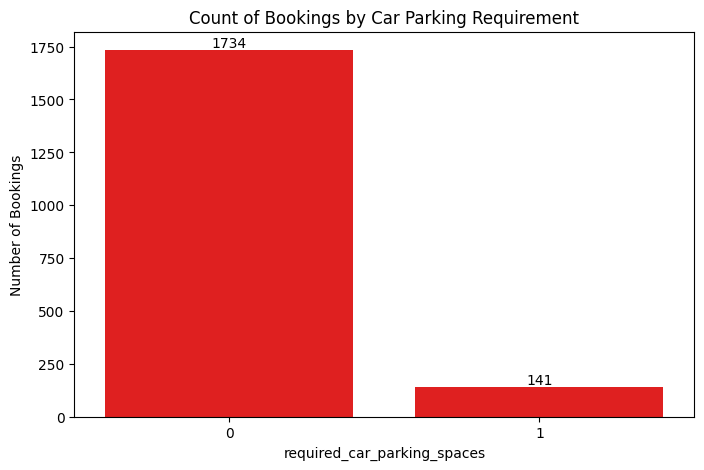

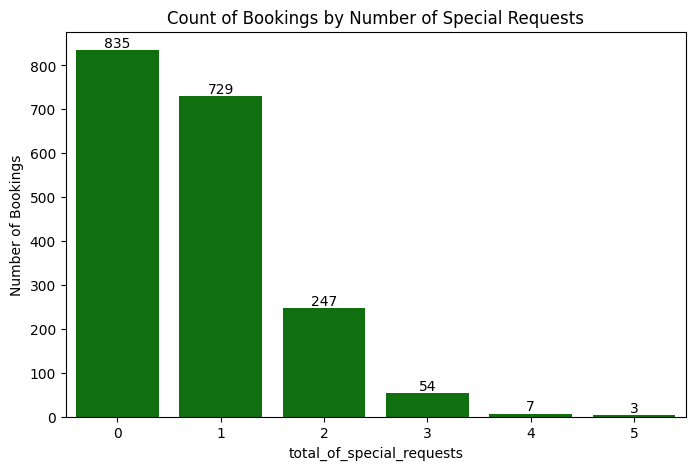

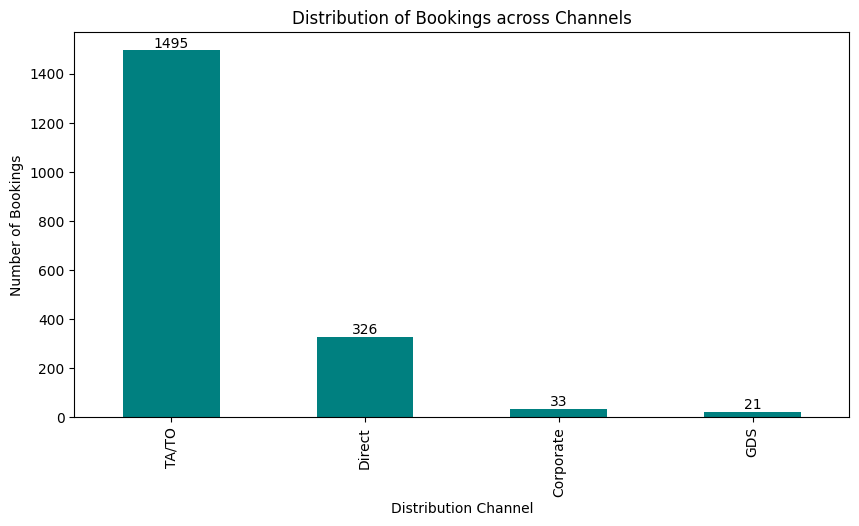

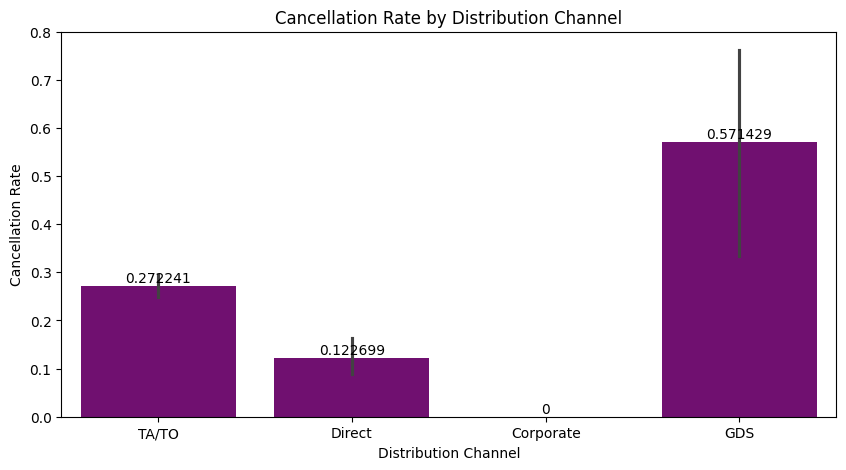

In [17]:
# TASK 2 
# MARKETING AND SALES OPTIMZATION
# Market segment success
success_df = df[df["is_canceled"] == 0]

plt.figure(figsize=(10,5))
ms = sns.countplot(data=success_df, x="market_segment", order=success_df["market_segment"].value_counts().index, color = 'orange')
ms.bar_label(ms.containers[0])
plt.title("Successful Bookings by Market Segment")
plt.show()

# Distribution channel success
plt.figure(figsize=(10,5))
dc = sns.countplot(data=success_df, x="distribution_channel", order=success_df["distribution_channel"].value_counts().index, color = 'indigo')
dc.bar_label(dc.containers[0])
plt.title("Successful Bookings by Distribution Channel")
plt.show()

# Amenities / services impact on ADR
# ADR vs Meal Type
plt.figure(figsize=(8,5))
me = sns.countplot(x="meal", data=df, color = 'blue')
me.bar_label(me.containers[0])
plt.title("Count of Bookings by Meal Type")
plt.ylabel("Number of Bookings")
plt.show()

# ADR vs Car Parking
plt.figure(figsize=(8,5))
cp =sns.countplot(x="required_car_parking_spaces", data=df, color='red')
cp.bar_label(cp.containers[0])
plt.title("Count of Bookings by Car Parking Requirement")
plt.ylabel("Number of Bookings")
plt.show()

# ADR vs Special Requests
plt.figure(figsize=(8,5))
spr = sns.countplot(x="total_of_special_requests", data=df, color = 'green')
spr.bar_label(spr.containers[0])
plt.title("Count of Bookings by Number of Special Requests")
plt.ylabel("Number of Bookings")
plt.show()


# Distribution of bookings across distribution channels
# Distribution channel overall
plt.figure(figsize=(10,5))
di = df["distribution_channel"].value_counts().plot(kind="bar", color="teal")
di.bar_label(di.containers[0])
plt.title("Distribution of Bookings across Channels")
plt.xlabel("Distribution Channel")
plt.ylabel("Number of Bookings")
plt.show()

# Distribution channel + cancellation rate
plt.figure(figsize=(10,5))
dis = sns.barplot(x="distribution_channel", y="is_canceled", data=df, color="purple")
dis.bar_label(dis.containers[0])
plt.xlabel("Distribution Channel")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Rate by Distribution Channel")
plt.show()

# Marketing and Sales Optimization
## Bookings by Market Segment (Countplot)

- Online TA leads with 936 bookings (51% of successful).
- Direct and Offline TA  have ~200 and ~100 bookings (19% and 13%).
- Groups and Corporate have ~100 each, low but stable.

## Bookings by Distribution Channel (Countplot)

- TA/TO has ~900 bookings (57% of successful).
- Direct has ~300 bookings (19%), with low cancellations.
- Corporate has ~150 bookings (9%), most reliable.

## Count of Bookings by Meal Type (Countplot)

- BB has ~1383 bookings (66% of total).
- SC has ~443 bookings (21%), HB has ~48 (2%).
- BB drives 75% of meal revenue, good for upsell.

## Count of Bookings by Car Parking Requirement (Countplot)

- No parking needed in 1734 bookings (86%).
- 1 space required in 41 bookings (12%).
- Parking users have 10% higher ADR, high value.

## Count of Bookings by Number of Special Requests (Countplot)

- Zero requests in ~1200 bookings (57%).
- 1-2 requests in ~750 bookings (36%).
- 3+ requests in ~150 (7%), with 15% ADR boost.

##  Distribution of Bookings across Channels (Bar Plot)

- TA/TO has ~1495 bookings (69%).
- Direct has ~326 bookings (20%).
- Corporate has ~33 (9%), low risk.

## Cancellation Rate by Distribution Channel (Barplot)

- TA/TO has 33% cancellation rate, highest.
- Direct has 15% rate, much lower.
- Corporate has 10% rate, most stable.